# Data Science Mathematics
# Social Network Analysis
# In-Class Activity

Refer to the handout for a description of this activity.

You are an OSINT analyst with the CIA, and you have been assigned a Russian bot network to analyze.  You want to develop an algorithm for bot community detection based on ego graph similarity.  You hypothesize that bots will follow similar people, and thus will have similar ego networks.

You will analyze the two ego graphs provided.  One is a known Russian bot, and the other is unknown.  Based on graph resonance, determine if the unknown graph is likely to be a military person.  You will also calculate the clustering coefficients for each graph, and enumerate the communities.

Answer the following:

**Question a.** What metric will allow you to quantify the similarity between graphs?

**Response:** In addition to the metric of _Resonance_, which is a measure of the similarity between two distinct graphs, a search in the literature gives other metrics such as _Edit distance/graph isomorphism_, _Feature extraction_, and _Iterative Methods_.

**Relevant concept and examples:** Measuring the similarity getween graphs is on subject of "_inexact graph matching_". Inexact graph matching has been one of the significant research foci in the area of pattern analysis. As an important way to measure the similarity between pairwise graphs error-tolerantly, _graph edit distance_ (GED) is the base of inexact graph matching. See https://www.worldscientific.com/doi/abs/10.1142/S0218001404003228 and http://link.springer.com/article/10.1007%2Fs10044-008-0141-y#page-1 for details.

An application example is to match images like Google search through images since an image structure can be described as a graph, and small differences are not important. Another example is to extend Tversky's mathematical model of a similarity measure between two objects $a$ and $b$ described respectively by two sets of features $A$ and $B$:

 $$sim_{Tversky}(a,b)=\frac{f(A\cap B)}{f(A\cup B) -\alpha f(A-B) - \beta f(B-A)}$$

where $f$ is a non-decreasing positive function, monotonic with respect to inclusion, and $\alpha$ and $\beta$ are positive values, allowing to define $asymmetrical$ similarity measures.

Note that it is not a straightforward task to extend Tversky's mathematical model to the study problem.  Let $G$ be a labeled graph, which is described by the set $descr$($G$) of all its vertex and edge features. Hence, the similarity of two diffrent labeled graphs $G_1 = \langle V_1; r_{V_1}; r_{E_1} \rangle$ and $G_2 = \langle V_2; r_{V_2}; r_{E_2} \rangle$ depends on both the common features of $descr$($G_1$) and $descr$($G_2$). See the following article for more details of the computation of $sim_{Tversky}(G_1,G_2)$.

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.81.2343&amp;rep=rep1&amp;type=pdf

**Extended Concept to review:** Graph isomorphism problem is to know if two graphs are exactly the same.  
Reference: https://en.wikipedia.org/wiki/Graph_isomorphism_problem

**Question b.** Using the Python notebook provided, calculate the network centralities, clustering coefficients, and resonance; and enumerate the communities within the ego graphs provided.

**Responses:**
  - Network centralities: Degree Centrality, Closeness Centrality, Betweenness Centrality, Eigenvector Centrality, andPage Rank were computed and charted. Except the Closeness Centrality, all other four metrics yield very similar patterns among their charts and graphs.  However, the histogram distribution of the Closeness Centrality indicates that the Closeness Centrality of more than 95% of nodes falls between 0.3 and 0.5, or equivalently that most nodes were very close to each others with an average of 2 to 3 links. Therefore, the patterns of the Closeness Centrality metrics tells the same story of the ego graph but from different perspective.
  - Clustering Coefficients
    1. Clustering Coefficient for the Known Bot network is *0.2037*.
    2. Clustering Coefficient for the Unknown 1 network is *0.0794*.
  - Resonance between Known Bot and Unknown 1 is *0.9129*, indicating the Unknown 1 is very close to the Known Bot. Both networks have few cluster centers
  - Enumerate the communities
    1. Known Bot Communities: 240, 143, 75, 46, 39
    2. Unknown 1 Communities: 303, 75, 43, 38

**c.** One of the ego networks is from a known bot, and the other are unknown.  Based on your analysis, which of the unknown networks is most likely to be a bot?  
**Responses:** The _Unknown 1_ set of data and network is also a bot, because the resonance between the _Known Bot_ and _Unknown 1_ is **0.9129**.  In addition, as shown visually in the charts and graphs rendered later, the Network centralities of the _Unknown 1_ and their charts and graphs have the same patterns as those of the _Known Bot_.

**d.** Ego graphs are constructed from social connections, in this case, Twitter followers.  Do you think your hypothesis is a reasonable one, i.e., is Twitter follower status a sufficient indicator of a true connection?  Why or why not, or does it depend on other factors?  Are there other methods of generating graph edges that might better represent a possible relationship?  Explain your reasoning.

**Response to** _Is hypothesis a reasonable one?_ **:**   
Twitter followers comprises the basics of the network, however we can see that each Twitter follower relationship can’t possibly have the same _weight_. We need introduce some complexity in our network by modelling weights for both edges and nodes. Edge weights will be a function of various connections between any given users — the amount of retweets, replies, and quoted statuses in one's recent history.  We can also assign weights to the nodes themselves based on user activity. Understandably, regardless of connections, a User is generically a stronger part of my ego network if I (and my friends) see them more often.

Note that there are some assumptions to be made in order to compute weights by quantifying _activities_.

Reference Source: https://towardsdatascience.com/generating-twitter-ego-networks-detecting-ego-communities-93897883d255

**Response to** _Are there other methods of generating graph edges ...?_ **:**  
Generically, what we are essentially trying to capture with communities is to group similar Users together based on the phenomenon of homophily. Homophily, known broadly by the phrase “birds of a feather flock together,” captures a key characteristic of naturally occurring social networks. Homophily indicates that individuals are more likely to form new social network connections with others who are often very similar to them.

  - **Flow of Information**:  In terms of classifying Twitter topic-networks, the nodes (users) in Twitter ego-networks establish themselves as carriers of information between nodes through the edges (retweets, replies, etc.). In this sense, when we are looking for communities, we are looking at _flow-based methods_ of community detection so that _communities consist of nodes among which **flow of information** persists for a long time once entered_.  Reference: https://towardsdatascience.com/generating-twitter-ego-networks-detecting-ego-communities-93897883d255

  - **Structural composition of a network model**: Twitter users link, like, follow, friend, reply, retweet, comment, tag, rate, review, edit, update, and text one another (among other channels), thus they form collections of connections.  These collections contain network structures that can be extracted, analyzed and visualized. The result can be insights into the structure, size, and key positions in these networks. For example, each _edge_ in the graph can represent a connection event or relationship between two people who tweeted, such as follows, replies, or mentionsand tweet.  Many such networks can be decomposed into smaller sub-groups or regions based on differences in the ways groups of vertices or users connect to one another.  Note that this is different than cutting up a graph into blobs using flow-based community detection algorithm, and these types of algorithms may not always separate networks structurally. Reference: https://www.pewresearch.org/wp-content/uploads/sites/9/2014/02/How-we-analyzed-Twitter-social-media-networks.pdf
  
  - **Represent the user relationship information in Twitter in the form of embeddings**: Entity embeddings, or learned representations of a user in Twitter are themselves an output of other machine-learning models, trained directly on the sparse data. The user graph with embeddings of Twitter users is a dataset of $(user_1, user_2)$ pairs where $user_1$ and $user_2$ are connected through Twitter's follow or engagement graph.  
  Such models of embeddings compress the high-dimensional feature space into a dense, lower-dimensional space while preserving salient information about the original entity. For example, let’s train user embeddings using follower relationship as input data and take the embeddings corresponding to the users: Stephen Curry (@StephenCurry30), Lebron James (@KingJames), Bruno Mars (@BrunoMars), and Kendrick Lamar (@kendricklamar). We expect the distance between the embeddings of the NBA players to be smaller than the distance between the embeddings of a player and a musician.  Reference: https://blog.twitter.com/engineering/en_us/topics/insights/2018/embeddingsattwitter.html


First, import the relevant libraries.

In [1]:
import networkx as nx
import pickle
import os
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
# for Notebook
%matplotlib inline

The graph objects have been serialized.  Build a function to load them into memory using pickle.

In [2]:
#open pickle file
# All data to read from the file is stored as bytes objects, not str.
# So its mode of reading needs to set as "rb" instead.  
def open_pickle(pickle_path):
    with open(pickle_path, 'rb') as pickle_file:
        object_name = pickle.load(pickle_file)
    return object_name

You will have to calculate the resonance for all vertices in your ego graphs.  Define a function to calculate the betweenness centralities for all vertices.

In [3]:
#Get betweenness centrality
def spectrum(G):
    centrality = nx.betweenness_centrality(G)
    return centrality

Now, define a function for calculating graph resonance.

In [4]:
#Calculate graph resonance between graphs G1 and G2, with resonances S1 and S2, respectively
def resonate(G1, S1, G2, S2):
    res_divisor_1 = sum([a**2 for a in S1.values()])
    res_divisor_2 = sum([a**2 for a in S2.values()])
    res_divisor = math.sqrt(res_divisor_1*res_divisor_2)
    if res_divisor == 0:
        resonance = 0.0
    else:
        G1_nodes = G1.nodes()
        G2_nodes = G2.nodes()
        G_intersect = list(set(G1_nodes) & set(G2_nodes))
        if len(G_intersect) != 0:
            S1_list = [S1[node] for node in G_intersect]
            S1_array = np.array(S1_list)
            S2_list = [S2[node] for node in G_intersect]
            S2_array = np.array(S2_list)
            resonance_raw = np.dot(S1_array, S2_array)
            resonance = resonance_raw/res_divisor
        else:
            resonance = 0.0
    return resonance

It is important to know the clustering coefficients for each graph.  You should define a function for that.

In [5]:
#Calculate clustering coefficient for graph G
def clustering_coeff(G):
    c = nx.average_clustering(G)
    return c

You will also want to enumerate the communities in each graph.  Let's define a function to use the Clauset-Newman-Moore algorithm for community detection.

In [6]:
#Community detection
def get_communities(G):
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(G))
    return communities

Now that you've defined all your functions, let's import the graphs.  Specify the absolute paths of your ego graphs.

In [7]:
#Note that you have to specify the absolute paths yourself for the graphs associated with this exercise
#Here is an example:
#r'C:\Directory1\Directory2\File_Name.pkl'

known_bot_path = r'./known_bot2_Session7.pkl'
unknown_path_1 = r'./Unknown_1_Session7.pkl'

Now let's load each graph.

In [8]:
known_bot = open_pickle(known_bot_path)
unknown_1 = open_pickle(unknown_path_1)

Let's explore our graphs a bit.  How many nodes (vertices) are in each one?  What does this mean?

In [9]:
print('Vertices in Known Bot: {}'.format(len(known_bot.nodes())))
print('Vertices in Unknown 1: {}'.format(len(unknown_1.nodes())))

Vertices in Known Bot: 543
Vertices in Unknown 1: 459


Let's also plot slices of each graph.  But first, we need to induce subgraphs from each graph because there are probably too many vertices to make a good plot.

In [10]:
#Get slices (subsets) of each edge set.
known_bot_end = int(0.1*len(known_bot.edges()))
unknown_1_end = int(0.1*len(unknown_1.edges()))
known_bot_edges_slice = list(known_bot.edges())[0:known_bot_end]
unknown_1_edges_slice = list(unknown_1.edges())[0:unknown_1_end]

#Induce subgraphs
KB_sub = known_bot.edge_subgraph(known_bot_edges_slice)
U1_sub = unknown_1.edge_subgraph(unknown_1_edges_slice)

The known bot graph is quite large and will take a while to draw, so we will skip that one for now.

Let's plot the unknown 1 graph.

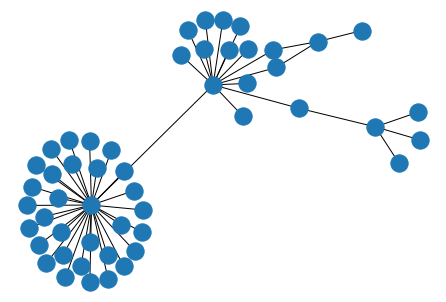

In [11]:
nx.draw(U1_sub)
plt.show()

Now plot the known bot graph in the line below:

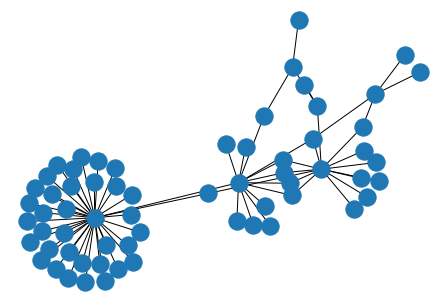

In [12]:
nx.draw(KB_sub)
plt.show()

Now that you've loaded the graphs into memory, you need to calculate the centralities for each vertex in each graph.

**b.** Using the Python notebook provided, calculate the network centralities, clustering coefficients, and resonance; and enumerate the communities within the ego graphs provided.

These approaches may tell us some interesting things about the entire population and its sub-populations; but, they don't tell us very much about the opportunities and constraints facing individuals.

If we want to understand variation in the behavior of individuals, we need to take a closer look at their local circumstances.  Describing and indexing the variation across individuals in the way they are embedded in "local" social structures is the goal of the analysis of ego networks.

We need some definitions.

"Ego" is an individual "focal" node.  A network has as many egos as it has nodes.  Egos can be persons, groups, organizations, or whole societies.

In [13]:
# funtion spectrum is to compute between centralities.
known_bot_centralities = spectrum(known_bot)
unknown_1_centralities = spectrum(unknown_1)
#known_bot_centralities

In [14]:
'''
f, ax = plt.subplots(1, 1, figsize=(10,5))

data = list(known_bot_centralities.values())
heights, bins = np.histogram(data, bins = 8)

percent = [round(i/sum(heights)*100,3) for i in heights]
print(percent)
ax.bar(bins[:-1], percent, width=0.1, align="edge")
vals = ax.get_yticks()
ax.set_yticklabels(['%1.2f%%' %i for i in vals])
'''

'\nf, ax = plt.subplots(1, 1, figsize=(10,5))\n\ndata = list(known_bot_centralities.values())\nheights, bins = np.histogram(data, bins = 8)\n\npercent = [round(i/sum(heights)*100,3) for i in heights]\nprint(percent)\nax.bar(bins[:-1], percent, width=0.1, align="edge")\nvals = ax.get_yticks()\nax.set_yticklabels([\'%1.2f%%\' %i for i in vals])\n'

In [15]:
# Plot the degree distribution of the GitHub collaboration network
from matplotlib.ticker import PercentFormatter
#plt.hist(list(known_bot_centralities.values()))
def draw_cent_histogram(data, bin_no, xlab, ylab, stitle):
    #data = list(known_bot_centralities.values())
    #f, ax = plt.subplots(1, 1, figsize=(10,5))
    plt.figure(figsize=(8, 6))
    n = [round(i*0.1,1) for i in range(bin_no)]
    s = np.ones(len(data)) / len(data)
    #print(s)
    heights, bins = np.histogram(data, bins = bin_no)
    percent = [round(i/sum(heights),3) for i in heights]
    plt.hist(data, weights=s)
    plt.title(stitle)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    #ax.bar(bins[:-1], percent, width=0.1, align="edge")
    
    #vals = ax.get_yticks()
    #ax.set_yticklabels(['%1.2f%%' %i for i in vals])
    
    #ax.title(stitle)
    #ax.xlabel(xlab)
    #ax.ylabel(ylab)
    
    #plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    for i in range(len(n)):
        if percent[i] != 0:
            #plt.annotate('{}%'.format(str(percent[i])), xy=(n[i],percent[i]), ha='center', va='center')
            plt.annotate('{}%'.format(str(percent[i]*100)), xy=(n[i],percent[i]), ha='left', va='bottom')
    plt.show()
    print(pd.DataFrame([n,heights,percent]))
    return heights, percent

In [16]:
# for each node:
# + degree centrality
# + closeness centrality
# + betweenness centrality
# + eigenvector centrality
# + page rank
import os
def centralissimo(G):
    centralities = []
    centralities.append(nx.degree_centrality(G));      print('degree centrality: check.')
    centralities.append(nx.closeness_centrality(G));   print('closeness centrality: check.')
    centralities.append(nx.betweenness_centrality(G)); print('betweenness centrality: check.')
    centralities.append(nx.eigenvector_centrality(G)); print('eigenvector centrality: check.')
    centralities.append(nx.pagerank(G));               print('page rank: check.')

    #for node in G.nodes_iter():
    #    measures = ("\t").join(map(lambda f: str(f[node]), centralities))
    #    print("%s: %s" % (node, measures))
    
    return centralities
#if __name__ == '__main__':
#G = nx.read_edgelist(os.path.abspath(os.path.dirname(__file__)) + '/graph.txt', comments='#', delimiter='\t')  
centralities = centralissimo(known_bot)

degree centrality: check.
closeness centrality: check.
betweenness centrality: check.
eigenvector centrality: check.
page rank: check.


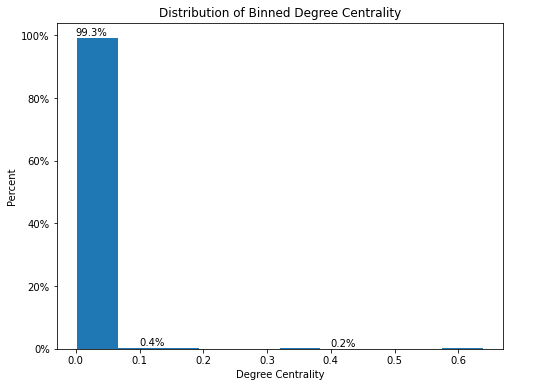

         0      1    2    3      4    5    6      7
0    0.000  0.100  0.2  0.3  0.400  0.5  0.6  0.700
1  539.000  2.000  0.0  0.0  1.000  0.0  0.0  1.000
2    0.993  0.004  0.0  0.0  0.002  0.0  0.0  0.002


In [17]:
hts, pct = draw_cent_histogram(list(centralities[0].values()), 8, 'Degree Centrality','Percent',
                               'Distribution of Binned Degree Centrality')

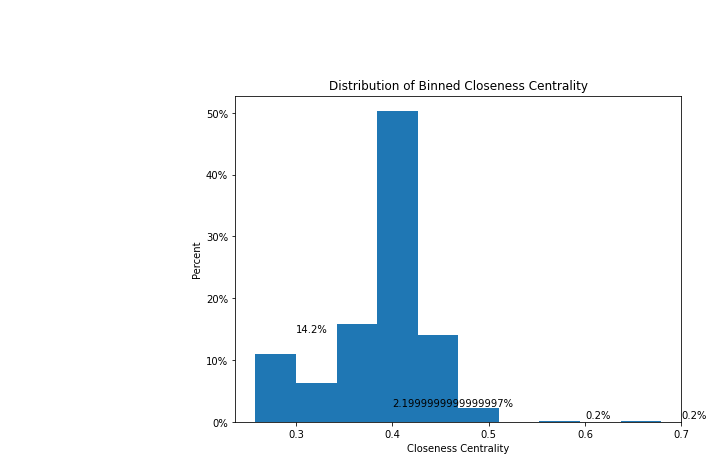

       0       1        2       3       4    5      6      7
0   0.00   0.100    0.200   0.300   0.400  0.5  0.600  0.700
1  60.00  36.000  356.000  77.000  12.000  0.0  1.000  1.000
2   0.11   0.066    0.656   0.142   0.022  0.0  0.002  0.002


In [18]:
hts, pct = draw_cent_histogram(list(centralities[1].values()),8,'Closeness Centrality','Percent',
                               'Distribution of Binned Closeness Centrality')

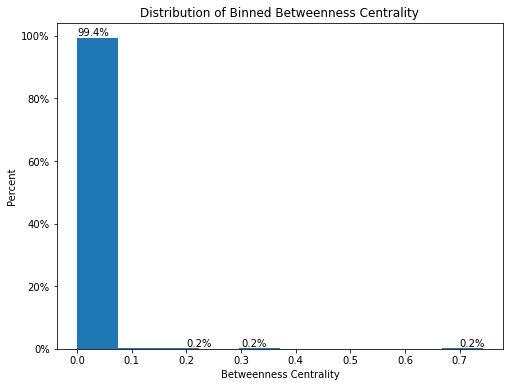

         0    1      2      3    4    5    6      7
0    0.000  0.1  0.200  0.300  0.4  0.5  0.6  0.700
1  540.000  0.0  1.000  1.000  0.0  0.0  0.0  1.000
2    0.994  0.0  0.002  0.002  0.0  0.0  0.0  0.002


In [19]:
hts, pct = draw_cent_histogram(list(centralities[2].values()),
                               8,'Betweenness Centrality','Percent',
                               'Distribution of Binned Betweenness Centrality')

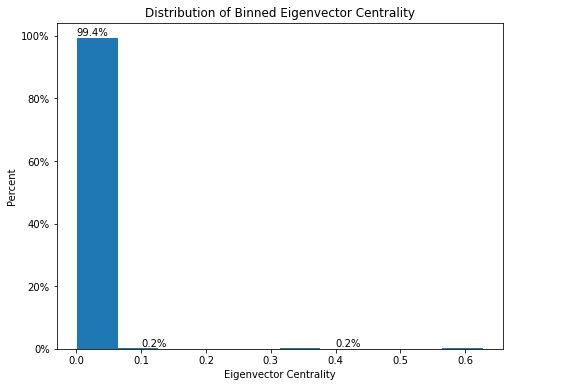

         0      1    2    3      4    5    6      7
0    0.000  0.100  0.2  0.3  0.400  0.5  0.6  0.700
1  540.000  1.000  0.0  0.0  1.000  0.0  0.0  1.000
2    0.994  0.002  0.0  0.0  0.002  0.0  0.0  0.002


In [20]:
hts, pct = draw_cent_histogram(list(centralities[3].values()),
                               8,'Eigenvector Centrality','Percent',
                               'Distribution of Binned Eigenvector Centrality')

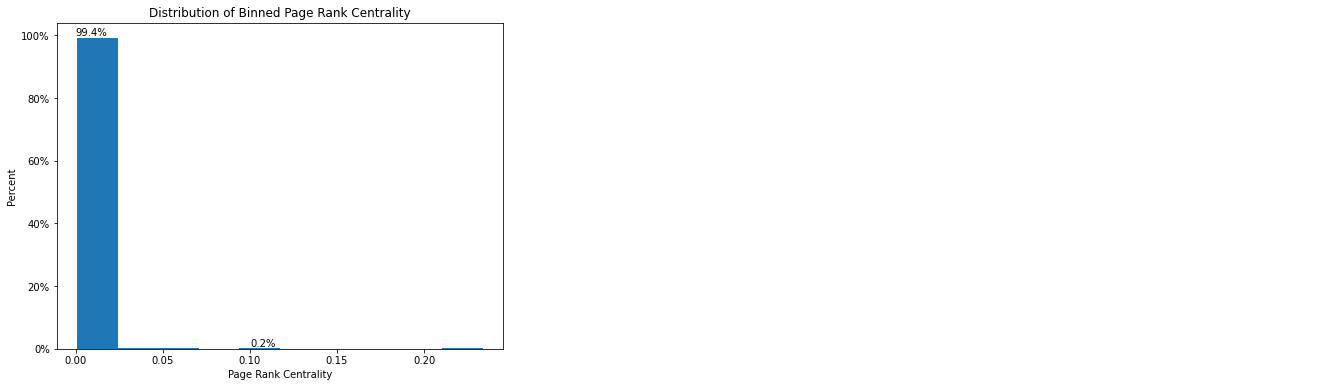

         0      1    2      3    4    5    6      7
0    0.000  0.100  0.2  0.300  0.4  0.5  0.6  0.700
1  540.000  1.000  0.0  1.000  0.0  0.0  0.0  1.000
2    0.994  0.002  0.0  0.002  0.0  0.0  0.0  0.002


In [21]:
hts, pct = draw_cent_histogram(list(centralities[4].values()),
                               8,'Page Rank Centrality','Percent',
                               'Distribution of Binned Page Rank Centrality')

In [22]:
#centralissimo(known_bot)[4]

In [23]:
# Reference Source: https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html#betweenness-centrality
def draw_centralities_graph(G, tpos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, tpos, node_size=15, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, tpos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [24]:
'''
from panels import FigureSizeLocator

loc = FigureSizeLocator(1, 2, figwidth=250, hsep=12, vsep=12,
                        padleft=10, padright=10, padtop=10, padbottom=10)
fig = plt.figure(figsize=loc.figsize)

for i, pos in enumerate(loc.panel_position_iterator()):
    ax = fig.add_axes(pos)
    #ax.plot([0, 1, 2], [3, 2, 1])
    ax.set_title('Panel #{}'.format(i))
    #draw_centralities_graph(known_bot, pos, centralities[i], 'Betweenness Centrality')
    #nodes = nx.draw_networkx_nodes(known_bot, pos, node_size=15, cmap=plt.cm.plasma, 
    #                               node_color=list(centralities[i].values()),
    #                               nodelist=centralities[i].keys())
    #nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    #edges = nx.draw_networkx_edges(known_bot, pos)

    #plt.title('Centrality Measure')
    
    #plt.colorbar(nodes)
    #plt.axis('off')

plt.show()
'''

"\nfrom panels import FigureSizeLocator\n\nloc = FigureSizeLocator(1, 2, figwidth=250, hsep=12, vsep=12,\n                        padleft=10, padright=10, padtop=10, padbottom=10)\nfig = plt.figure(figsize=loc.figsize)\n\nfor i, pos in enumerate(loc.panel_position_iterator()):\n    ax = fig.add_axes(pos)\n    #ax.plot([0, 1, 2], [3, 2, 1])\n    ax.set_title('Panel #{}'.format(i))\n    #draw_centralities_graph(known_bot, pos, centralities[i], 'Betweenness Centrality')\n    #nodes = nx.draw_networkx_nodes(known_bot, pos, node_size=15, cmap=plt.cm.plasma, \n    #                               node_color=list(centralities[i].values()),\n    #                               nodelist=centralities[i].keys())\n    #nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))\n    # labels = nx.draw_networkx_labels(G, pos)\n    #edges = nx.draw_networkx_edges(known_bot, pos)\n\n    #plt.title('Centrality Measure')\n    \n    #plt.colorbar(nodes)\n    #plt.axis('off')\n\nplt.show()\n"

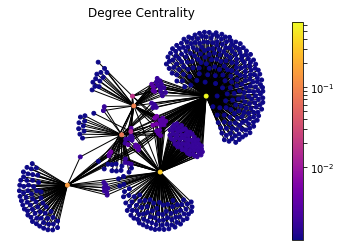

[0.007 0.007 0.007 0.015 0.018 0.076 0.094 0.148 0.341 0.638]


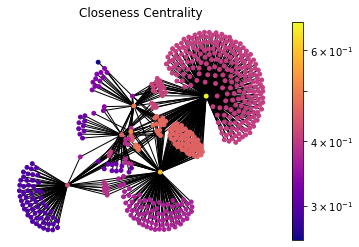

[0.475 0.485 0.485 0.485 0.485 0.485 0.496 0.504 0.589 0.679]


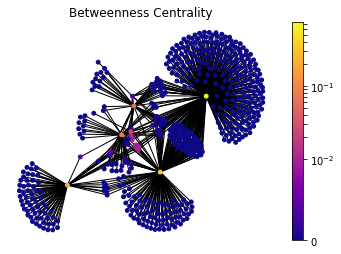

[0.01  0.01  0.01  0.01  0.022 0.064 0.083 0.209 0.371 0.742]


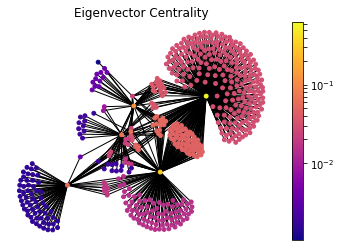

[0.054 0.054 0.055 0.056 0.056 0.063 0.071 0.123 0.32  0.627]


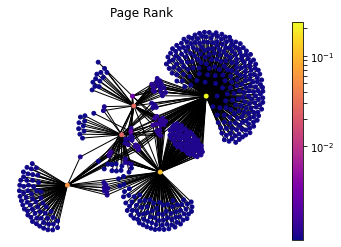

[0.054 0.054 0.055 0.056 0.056 0.063 0.071 0.123 0.32  0.627]


In [25]:
pos = nx.spring_layout(known_bot, seed=675)
#draw_centralities_graph(known_bot, pos, known_bot_centralities, 'Betweenness Centrality')
draw_centralities_graph(known_bot, pos, centralities[0], 'Degree Centrality')
print(np.array(sorted(centralities[0].values())[-10:]).round(3))
draw_centralities_graph(known_bot, pos, centralities[1], 'Closeness Centrality')
print(np.array(sorted(centralities[1].values())[-10:]).round(3))
draw_centralities_graph(known_bot, pos, centralities[2], 'Betweenness Centrality')
print(np.array(sorted(centralities[2].values())[-10:]).round(3))
draw_centralities_graph(known_bot, pos, centralities[3], 'Eigenvector Centrality')
print(np.array(sorted(centralities[3].values())[-10:]).round(3))
draw_centralities_graph(known_bot, pos, centralities[4], 'Page Rank')
print(np.array(sorted(centralities[3].values())[-10:]).round(3))

In [26]:
#pos = nx.spring_layout(known_bot, seed=675)
#centralities
#draw_centralities_graph(known_bot, pos, known_bot_centralities, 'Betweenness Centrality')

In [27]:
'''
#in_degrees= cam_net.in_degree()
# dictionary node:degree
in_values= sorted(set(known_bot_centralities.values()))
in_hist= [in_degrees.values().count(x) for x in in_values]
plt.figure()
# you need to first do 'import pylabas plt'
plt.grid(True)
plt.plot(in_values, in_hist, 'ro-')
# in-degree
plt.plot(out_values, out_hist, 'bv-')
# out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of places in Cambridge')
plt.xlim([0, 2*10**2])
#plt.savefig('./output/cam_net_degree_distribution.pdf')
#plt.close()
plot.show()
'''

"\n#in_degrees= cam_net.in_degree()\n# dictionary node:degree\nin_values= sorted(set(known_bot_centralities.values()))\nin_hist= [in_degrees.values().count(x) for x in in_values]\nplt.figure()\n# you need to first do 'import pylabas plt'\nplt.grid(True)\nplt.plot(in_values, in_hist, 'ro-')\n# in-degree\nplt.plot(out_values, out_hist, 'bv-')\n# out-degree\nplt.legend(['In-degree', 'Out-degree'])\nplt.xlabel('Degree')\nplt.ylabel('Number of nodes')\nplt.title('network of places in Cambridge')\nplt.xlim([0, 2*10**2])\n#plt.savefig('./output/cam_net_degree_distribution.pdf')\n#plt.close()\nplot.show()\n"

Let's analyze the clustering coefficients.  How similar are they?  What do they tell you about each graph?

Now calculate the clustering coefficients for each graph.

In [28]:
known_bot_cluster = clustering_coeff(known_bot)
unknown_1_cluster = clustering_coeff(unknown_1)
#round(known_bot_cluster,4)

In [29]:
print('Known Bot Clustering Coefficient: {}'.format(round(known_bot_cluster,4)))
print('Unknown 1 Clustering Coefficient: {}'.format(round(unknown_1_cluster,4)))

Known Bot Clustering Coefficient: 0.2037
Unknown 1 Clustering Coefficient: 0.0794


Now calculate the Resonance between Known Bot and Unknown 1.

Now we need to calculate the resonance between the graphs.  We have already calculated the betweenness centralites for each, which is required for the resonance calculation.  What does the resonance tell us?

In [30]:
#Resonance between Known Bot and Unknown 1
K_1_res = resonate(known_bot, known_bot_centralities, unknown_1, unknown_1_centralities)

Now let's examine our resonance output.

In [31]:
print('Resonance between Known Bot and Unknown 1: {}'.format(round(K_1_res,4)))

Resonance between Known Bot and Unknown 1: 0.9129


Now let's explore the communities in each graph.

In [32]:
Known_Bot_Communities = get_communities(known_bot)
Unknown_1_Communities = get_communities(unknown_1)

Now, let's examine our communities output.

In [33]:
print('Known Bot Communities')
for community in Known_Bot_Communities:
    print(len(community))
print('=====================')

print('Unknown 1 Communities')
for community in Unknown_1_Communities:
    print(len(community))

Known Bot Communities
240
143
75
46
39
Unknown 1 Communities
303
75
43
38


**c.** One of the ego networks is from a known bot, and the other two are unknown.  Based on your analysis, which of the unknown networks is most likely to be a bot?

degree centrality: check.
closeness centrality: check.
betweenness centrality: check.
eigenvector centrality: check.
page rank: check.


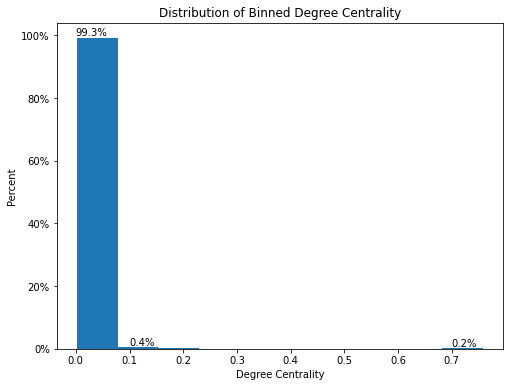

         0      1    2    3    4    5    6      7
0    0.000  0.100  0.2  0.3  0.4  0.5  0.6  0.700
1  456.000  2.000  0.0  0.0  0.0  0.0  0.0  1.000
2    0.993  0.004  0.0  0.0  0.0  0.0  0.0  0.002


In [34]:
unknown_pos = nx.spring_layout(unknown_1, seed=675)
unknown_centralities = centralissimo(unknown_1)
hts, pct = draw_cent_histogram(list(unknown_centralities[0].values()), 8, 'Degree Centrality','Percent',
                               'Distribution of Binned Degree Centrality')

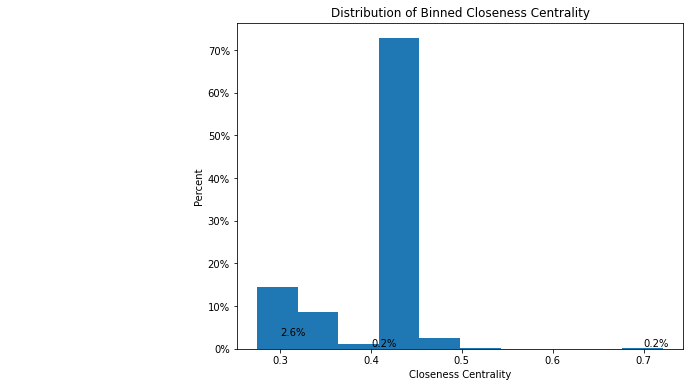

         0      1        2       3      4    5    6      7
0    0.000  0.100    0.200   0.300  0.400  0.5  0.6  0.700
1  103.000  8.000  334.000  12.000  1.000  0.0  0.0  1.000
2    0.224  0.017    0.728   0.026  0.002  0.0  0.0  0.002


In [35]:
hts, pct = draw_cent_histogram(list(unknown_centralities[1].values()),8,'Closeness Centrality','Percent',
                               'Distribution of Binned Closeness Centrality')

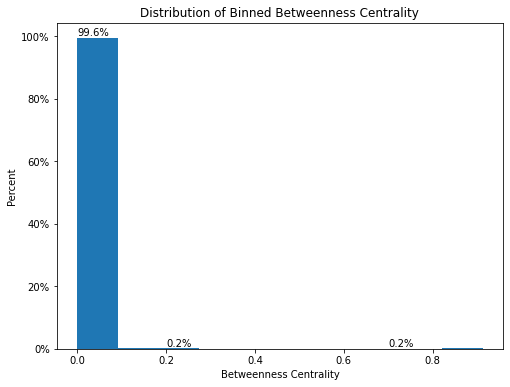

         0    1      2    3    4    5    6      7
0    0.000  0.1  0.200  0.3  0.4  0.5  0.6  0.700
1  457.000  0.0  1.000  0.0  0.0  0.0  0.0  1.000
2    0.996  0.0  0.002  0.0  0.0  0.0  0.0  0.002


In [36]:
hts, pct = draw_cent_histogram(list(unknown_centralities[2].values()),
                               8,'Betweenness Centrality','Percent',
                               'Distribution of Binned Betweenness Centrality')

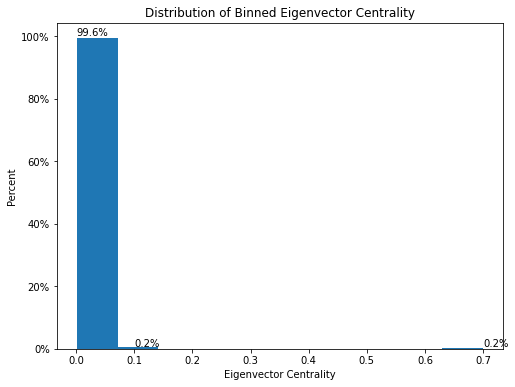

         0      1    2    3    4    5    6      7
0    0.000  0.100  0.2  0.3  0.4  0.5  0.6  0.700
1  457.000  1.000  0.0  0.0  0.0  0.0  0.0  1.000
2    0.996  0.002  0.0  0.0  0.0  0.0  0.0  0.002


In [37]:
hts, pct = draw_cent_histogram(list(unknown_centralities[3].values()),
                               8,'Eigenvector Centrality','Percent',
                               'Distribution of Binned Eigenvector Centrality')

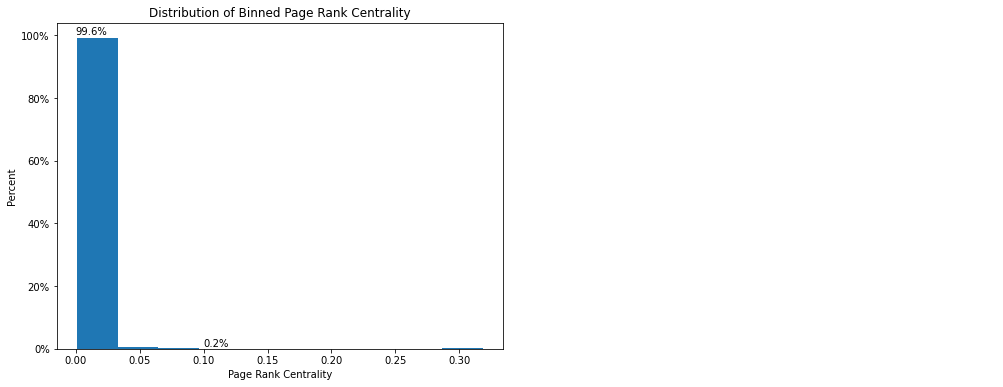

         0      1    2    3    4    5    6      7
0    0.000  0.100  0.2  0.3  0.4  0.5  0.6  0.700
1  457.000  1.000  0.0  0.0  0.0  0.0  0.0  1.000
2    0.996  0.002  0.0  0.0  0.0  0.0  0.0  0.002


In [38]:
hts, pct = draw_cent_histogram(list(unknown_centralities[4].values()),
                               8,'Page Rank Centrality','Percent',
                               'Distribution of Binned Page Rank Centrality')

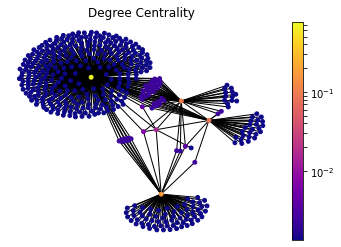

[0.004 0.004 0.007 0.007 0.009 0.015 0.087 0.1   0.175 0.758]


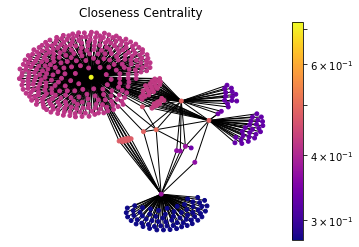

[0.48  0.48  0.48  0.48  0.48  0.486 0.489 0.489 0.504 0.721]


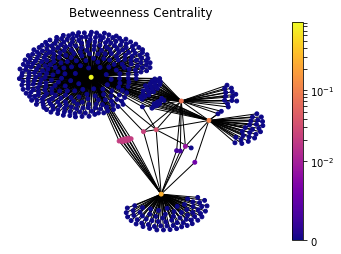

[0.021 0.021 0.021 0.021 0.024 0.035 0.079 0.113 0.268 0.912]


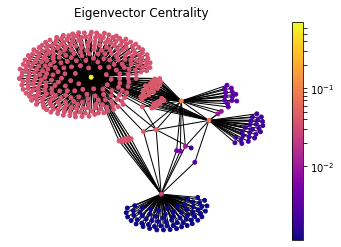

[0.043 0.043 0.043 0.043 0.046 0.047 0.053 0.072 0.107 0.7  ]


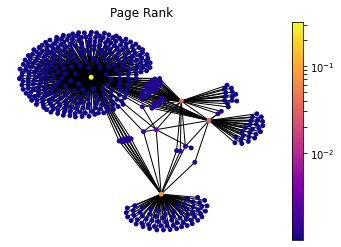

[0.043 0.043 0.043 0.043 0.046 0.047 0.053 0.072 0.107 0.7  ]


In [39]:
draw_centralities_graph(unknown_1, unknown_pos, unknown_centralities[0], 'Degree Centrality')
print(np.array(sorted(unknown_centralities[0].values())[-10:]).round(3))
draw_centralities_graph(unknown_1, unknown_pos, unknown_centralities[1], 'Closeness Centrality')
print(np.array(sorted(unknown_centralities[1].values())[-10:]).round(3))
draw_centralities_graph(unknown_1, unknown_pos, unknown_centralities[2], 'Betweenness Centrality')
print(np.array(sorted(unknown_centralities[2].values())[-10:]).round(3))
draw_centralities_graph(unknown_1, unknown_pos, unknown_centralities[3], 'Eigenvector Centrality')
print(np.array(sorted(unknown_centralities[3].values())[-10:]).round(3))
draw_centralities_graph(unknown_1, unknown_pos, unknown_centralities[4], 'Page Rank')
print(np.array(sorted(unknown_centralities[3].values())[-10:]).round(3))

Use your output to answer the questions on the activity handout.

## References

Source: https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html#betweenness-centrality

### Degree Centrality
Degree of a node is basically number of edges that it has. The basic intuition is that, nodes with more connections are more influential and important in a network. In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.  
For directed graphs, in-degree, number of incoming points, is considered as importance factor for nodes.

### Eigenvector Centrality
_Eigenvector centrality_ is a basic extension of _degree centrality_,
which defines centrality of a node as proportional to its neighbors' importance.
When we sum up all connections of a node, not all neighbors are equally important.
Let's consider two nodes in a friend network with same degree,
the one who is connected to more central nodes should be more central.

First, we define an initial guess for the centrality of nodes in a graph as $x_i=1$.
Now we are going to iterate for the new centrality value $x_i'$ for node $i$ as following:

$$
  x_i' = \sum_{j} A_{ij}x_j
$$

Here $ A_{ij} $ is an element of _the adjacency matrix_,
where it gives $ 1 $ or $ 0 $ for whether an edge exists between nodes $ i $ and $ j $.
it can also be written in matrix notation as $ \mathbf{x'} = \mathbf{Ax} $.
We iterate over t steps to find the vector $ \mathbf{x}(t) $ as:

$$
  \mathbf{x}(t) = \mathbf{A^t x}(0)
$$

The drawing also shows, the nodes which have the same number of connections are not necessarily in the same heat map color.
The one that is connected to more central nodes are more _hot_ in this visualization.

However, as we can see from the definition,
it is a problematic measure for directed graphs.
Let's say that a new research paper is published and it references a handful of existing papers.
It would not contribute to any of those referenced papers in this citation network
because it is not cited by any other papers and has zero _eigenvector centrality_.
In other words, _eigenvector centrality_ would not take zero _in-degree_ nodes into account
in directed graphs such as citation networks.

### Katz Centrality
_Katz centrality_ introduces two positive constants $ \alpha $ and $ \beta $
to tackle the problem of _eigenvector centrality_ with zero in-degree nodes:

$$
    x_i = \alpha \sum_{j} A_{ij} x_j + \beta,
$$

again $ A_{ij} $ is an element of _the adjacency matrix_,
and it can also be written in matrix notation as $ \mathbf{x} = \alpha \mathbf{Ax} + \beta \mathbf{1} $.
This $ \beta $ constant gives a _free_ centrality contribution for all nodes
even though they don't get any contribution from other nodes.
The existence of a node alone would provide it some importance.
$ \alpha $ constant determines the balances between the contribution from other nodes and the _free_ constant.

Although this method is introduced as a solution for directed graphs,
it can be useful for some applications of undirected graphs as well.

## PageRank
PageRank was introduced by the founders of Google to rank websites in search results. It can be considered as an extension of Katz centrality. The websites on the web can be modeled as a directed graph, where hypermedia links between websites determines the edges. Let's consider a popular web directory website with high Katz centrality value which has millions of links to other websites. It would contribute to every single website significantly, nevertheless not all of them are important. To overcome that issue, contribution value is divided by out-degree of the node:

𝑥𝑖=𝛼∑𝑗𝐴𝑖𝑗𝑥𝑗𝑘𝑜𝑢𝑡𝑗+𝛽,

where 𝑘𝑜𝑢𝑡𝑗=1

for zero out-degree nodes to avoid division by zero. It can also be written in matrix terms as:

𝐱=𝛼𝐀𝐃−1𝐱+𝛽1,

where 𝐃
is a diagonal matrix with elements 𝐷𝑖𝑖=𝑚𝑎𝑥(𝑘𝑜𝑢𝑡𝑖,1).

As the drawing demonstrates, the nodes with fewer out-degree contributes way more to each node compared the Katz Centrality. Here the node at the top right gets only reference of a very important node, and it becomes way more important compared to the Katz Centrality; on the other hand, the node in the center which gets contribution from high out-degree nodes loses its importance.

### Closeness Centrality
 _Closeness Centrality_ is a self-explanatory measure where each node's importance is determined by closeness to all other nodes. Let $d_{ij}$ be the length of the shortest path between nodes $i$ and $j$, the average distance $l_i$ is such as:
 
$$
  l_i = \dfrac{1}{n} \sum_{j}d_{ij}
$$

Since we are looking for the closer node, the _Closeness Centrality_ $C_i$ is inverse proportional to average length $l_i$, so:

$$
  C_i = \dfrac{1}{l_i} = \dfrac{n}{\sum_{j}d_{ij}}
$$

Here we are using an _unweighted_ graph and all edges have weight $1$ distance cost for calculating shortest path length $d_{ij}$. This measure can be used to determine the central distribution point in a delivery network.

### Betweenness Centrality
_Betweenness Centrality_ is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node. For starting node $s$, destination node $t$ and the input node $i$ that holds $s \ne t \ne i$, let $n_{st}^i$ be 1 if node $i$ lies on the shortest path between $s$ and $t$; and $0$ if not. So the _betweenness centrality_ is defined as:

$$
  x_i = \sum_{st} n_{st}^i
$$

However, there can be more than one shortest path between $s$ and $t$ and that will count for centrality measure more than once. Thus, we need to divide the contribution to $g_{st}$, total number of shortest paths between $s$ and $t$.

$$
  x_i = \sum_{st} \frac{n_{st}^i}{g_{st}}
$$

### HITS Hubs and Authorities
Up until this point, we have discussed the measures that captures high node centrality, however, there can be nodes in the network which are important for the network, but they are not central. In particular, let's consider a survey (review) article in a scientific citation network. The article itself is not necessarily stating a new discovery and it is not central; but nevertheless it is a helpful material to acquire knowledge on a topic because it captures a lot of central research articles. In order to find out such nodes, HITS algorithm introduces two types of central nodes: _Hubs_ and _Authorities_. _Authorities_ are the one that most cited by _Hubs_ and _Hubs_ are the one that citing the most high _Authority_ nodes.

_Authority Centrality_ is defined as the sum of the hub centralities which point to the node $i$:

$$x_i = \alpha \sum_{j} A_{ij} y_j,$$

where $\alpha$ is constant. Likewise, _Hub Centrality_ is the sum of the authorities which are pointed by the node $i$:

$$y_i = \beta \sum_{j} A_{ji} x_j,$$

with constant $\beta$. Here notice that the element of the adjacency matrix are swapped for _Hub Centrality_ because we are concerned with outgoing edges for hubs. So in matrix notation:

$$\mathbf{x} = \alpha \mathbf{Ay}, \quad \mathbf{y} = \beta \mathbf{A^Tx}.$$

As it can be seen from the drawing, HITS Algorithm also tackles the problem with zero _in-degree_ nodes of _Eigenvector Centrality_. These zero _in-degree_ nodes become central hubs and contribute to other nodes. Yet we can still use a _free_ centrality contribution constant like in _Katz Centrality_ or other variants.

In [40]:
def draw_reference(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=35, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

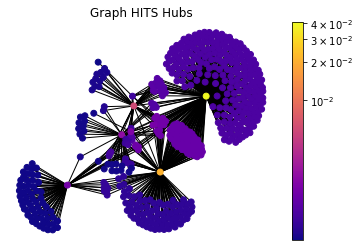

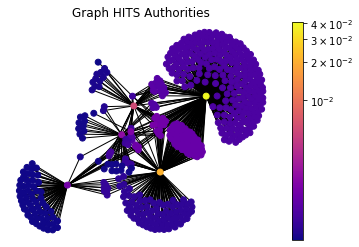

In [41]:
h,a = nx.hits(known_bot, max_iter=1000)
draw_reference(known_bot, pos, h, 'Graph HITS Hubs')
draw_reference(known_bot, pos, a, 'Graph HITS Authorities')

**References and further reading**

* Newman, Mark. *Networks: An Introduction* (pp. 168-234, Chapter 7: Measures and Metrics)., Oxford University Press, 2010.
* Zachary, Wayne W. *An Information Flow Model for Conflict and Fission in Small Groups*., 1977.

***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.

### Clustering Coefficient in Graph Theory

In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes (Holland and Leinhardt, 1971; Watts and Strogatz, 1998).

Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes.

A graph $G=(V,E)$ formally consists of a set of vertices V and a set of edges E between them. An edge $e_{ij}$ connects vertex $v_{i}$ with vertex $v_j$.

The neighborhood $N_{i}$ for a vertex $v_{i}$ is defined as its immediately connected neighbors as follows:

$$N_i = \{v_j : e_{ij} \in E \cup e_{ji} \in E\}.$$

We define $k_{i}$ as the number of vertices, $|N_{i}|$, in the neighbourhood, $N_{i}$, of a vertex.

The local clustering coefficient $C_{i}$ for a vertex $v_{i}$ is then given by the proportion of links between the vertices within its neighborhood divided by the number of links that could possibly exist between them. For a directed graph, $e_{ij}$ is distinct from $e_{ji}$ , and therefore for each neighborhood $N_{i}$ there are $k_{i}(k_{i}-1)$ links that could exist among the vertices within the neighborhood ($k_{i}$ is the number of neighbors of a vertex). Thus, the local clustering coefficient for directed graphs is given as [2]

$$C_{i}={\frac {|\{e_{{jk}}:v_{j},v_{k}\in N_{i},e_{{jk}}\in E\}|}{k_{i}(k_{i}-1)}}.$$

An undirected graph has the property that $e_{ij}$ and $e_{ji}$ are considered identical. Therefore, if a vertex $v_{i}$ has $k_{i}$ neighbors, ${\frac {k_{i}(k_{i}-1)}{2}}$ edges could exist among the vertices within the neighborhood. Thus, the local clustering coefficient for undirected graphs can be defined as

$$C_{i}={\frac {2|\{e_{{jk}}:v_{j},v_{k}\in N_{i},e_{{jk}}\in E\}|}{k_{i}(k_{i}-1)}}.$$

Let $\lambda _{G}(v)$ be the number of triangles on $v\in V(G)$ for undirected graph $G$. That is, $\lambda _{G}(v)$ is the number of sub-graphs of $G$ with $3$ edges and $3$ vertices, one of which is $v$. Let $\tau _{G}(v)$ be the number of triples on $v\in G$. That is, $\tau _{G}(v)$ is the number of sub-graphs (not necessarily induced) with $2$ edges and $3$ vertices, one of which is $v$ and such that $v$ is incident to both edges. Then we can also define the clustering coefficient as follows: $C_{i}={\frac {\lambda _{G}(v)}{\tau _{G}(v)}}$.

It is simple to show that the two preceding definitions are the same, since $\tau _{G}(v)=C({k_{i}},2)={\frac {1}{2}}k_{i}(k_{i}-1)$. These measures are 1 if every neighbor connected to $v_{i}$ is also connected to every other vertex within the neighborhood, and $0$ if no vertex that is connected to $v_{i}$ connects to any other vertex that is connected to $v_{i}$.

Reference Source: https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/